In [1]:
# importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# loading the dataset

In [3]:
player=pd.read_csv("nba_Player data.csv")

In [4]:
player.head()

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,NaN,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298,0.093,15.2


In [5]:
player.tail()

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
492,Delon Wright,SG,28,28,823.0,0.559,0.298,0.346,16.6
493,Thaddeus Young,PF,32,23,592.0,0.597,0.104,0.169,18.5
494,Trae Young,PG,22,26,901.0,0.598,0.349,0.577,22.9
495,Cody Zeller,C,28,15,361.0,0.569,0.133,0.242,18.2
496,Ivica Zubac,C,23,30,586.0,0.722,0.007,0.500,20.5


In [6]:
player.head().transpose()

,0,1,2,3,4
Player,Precious Achiuwa,Jaylen Adams,Steven Adams,Bam Adebayo,LaMarcus Aldridge
Position,PF,PG,C,C,C
Age,21,24,27,23,35
Games,28,6,27,26,18
Minutes Played,408.0,17.0,760.0,873.0,480.0
True Shooting(%),0.599,0.125,0.592,0.641,0.542
Threepoint Attempt rate,0.0,0.25,NaN,0.015,0.298
Free throw attempt rate,0.541,0.0,0.397,0.469,0.093
Player Efficiency Rating,15.1,-6.9,15.9,22.7,15.2


# checking the missing values

In [7]:
player.isna().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              2
True Shooting(%)            3
Threepoint Attempt rate     2
Free throw attempt rate     2
Player Efficiency Rating    0
dtype: int64

In [8]:
player["Minutes Played"].fillna(player["Minutes Played"].mean(),inplace=True)

In [9]:
#now checking the values
player.isna().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              0
True Shooting(%)            3
Threepoint Attempt rate     2
Free throw attempt rate     2
Player Efficiency Rating    0
dtype: int64

In [10]:
player["True Shooting(%)"].fillna(player["True Shooting(%)"].mean(),inplace=True)

In [11]:
player.isna().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              0
True Shooting(%)            0
Threepoint Attempt rate     2
Free throw attempt rate     2
Player Efficiency Rating    0
dtype: int64

In [12]:
player["Threepoint Attempt rate"].fillna(player["Threepoint Attempt rate"].mean(),inplace=True)

In [13]:
player.isna().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              0
True Shooting(%)            0
Threepoint Attempt rate     0
Free throw attempt rate     2
Player Efficiency Rating    0
dtype: int64

In [14]:
player.dropna(inplace=True)

In [15]:
#now checking the dataset
player.isna().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes Played              0
True Shooting(%)            0
Threepoint Attempt rate     0
Free throw attempt rate     0
Player Efficiency Rating    0
dtype: int64

In [16]:
len(player)

495

In [17]:
#dividing dataset into x and y

In [18]:
x=player.drop("Player Efficiency Rating",axis=1)

In [19]:
y=player["Player Efficiency Rating"]

In [20]:
x

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000000,0.541
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250000,0.000
2,Steven Adams,C,27,27,760.0,0.592,0.406362,0.397
3,Bam Adebayo,C,23,26,873.0,0.641,0.015000,0.469
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298000,0.093
...,...,...,...,...,...,...,...,...
492,Delon Wright,SG,28,28,823.0,0.559,0.298000,0.346
493,Thaddeus Young,PF,32,23,592.0,0.597,0.104000,0.169
494,Trae Young,PG,22,26,901.0,0.598,0.349000,0.577
495,Cody Zeller,C,28,15,361.0,0.569,0.133000,0.242


In [21]:
y

0      15.1
1      -6.9
2      15.9
3      22.7
4      15.2
       ... 
492    16.6
493    18.5
494    22.9
495    18.2
496    20.5
Name: Player Efficiency Rating, Length: 495, dtype: float64

# now looking at the categorical features

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
Categorical_features=["Player","Position"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               Categorical_features)],
                              remainder="passthrough")
transformed_x=transformer.fit_transform(player)
transformed_x
    

<495x495 sparse matrix of type '<class 'numpy.float64'>'
	with 4384 stored elements in Compressed Sparse Row format>

In [23]:
transformed_x

<495x495 sparse matrix of type '<class 'numpy.float64'>'
	with 4384 stored elements in Compressed Sparse Row format>

In [24]:
pd.DataFrame(transformed_x)

,0
0,"(0, 373)\t1.0\n (0, 483)\t1.0\n (0, 488)\t..."
1,"(0, 214)\t1.0\n (0, 484)\t1.0\n (0, 488)\t..."
2,"(0, 417)\t1.0\n (0, 479)\t1.0\n (0, 488)\t..."
3,"(0, 25)\t1.0\n (0, 479)\t1.0\n (0, 488)\t2..."
4,"(0, 285)\t1.0\n (0, 479)\t1.0\n (0, 488)\t..."
...,...
490,"(0, 108)\t1.0\n (0, 487)\t1.0\n (0, 488)\t..."
491,"(0, 430)\t1.0\n (0, 483)\t1.0\n (0, 488)\t..."
492,"(0, 444)\t1.0\n (0, 484)\t1.0\n (0, 488)\t..."
493,"(0, 72)\t1.0\n (0, 479)\t1.0\n (0, 488)\t2..."


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape,x_test.shape

((396, 495), (99, 495))

In [27]:
y_train.shape,y_test.shape

((396,), (99,))

# model selection

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

# Prediction

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred

array([18.29961576, 18.79991587, 12.49979428, 17.49969914,  4.39981042,
       12.39990205, 10.60055617,  5.00012054,  8.70061234, 21.30015764,
       10.7002234 , 16.00012632, 13.30005887, 15.50027607,  9.99979168,
        1.40048423, 13.99980472, 11.60015321,  7.40017375, 13.39978625,
        9.20025129, 11.89994321, 22.89982017, 16.39998269, 16.29979347,
       16.60018486,  9.70026317,  7.99999116, 24.19980287, 22.29976431,
        9.60016896, 13.49991372,  4.49993075, 15.899691  , 24.10012116,
       38.7004201 , 11.70013875,  4.60001308, 15.3999398 , 20.09985657,
       10.49991389, 18.20015761,  8.40024367, 14.69983419, 15.10021593,
        7.49894239, 14.800111  , 12.9000951 , 29.7987019 , 13.29998705,
        6.99974154,  8.89989556, 17.5999309 ,  9.89999136, 11.19981619,
        8.90023425, 14.30027505, 16.59996086, 16.19986322, 13.90043086,
       18.39948627, 13.20045405, 15.00031131, 19.09997844, 17.29993094,
       13.90003341, 22.89936177, 12.89989873, 15.00030629, 11.39

# Evolution

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [33]:
mse=mean_squared_error(y_test,y_pred)

In [34]:
mse

9.83868069766355e-08

In [35]:
mae=mean_absolute_error(y_test,y_pred)

In [36]:
mae

0.00022581484225582944

In [37]:
r2=r2_score(y_test,y_pred)

In [38]:
r2

0.9999999974935775

In [39]:
model.score(transformed_x,y)

0.9999999996399326

# visualizing the score of the linear model

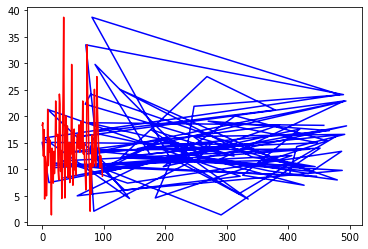

In [40]:
plt.plot(y_test,color="blue")
plt.plot(y_pred,color="red")

In [41]:
#checking for another model

In [42]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2,random_state=42)
model2.fit(x_train,y_train)

RandomForestRegressor()

In [43]:
y_pred2=model2.predict(x_test)

In [44]:
y_pred2

array([18.273, 18.708, 12.493, 17.511,  4.314, 12.399, 10.637,  5.104,
        8.598, 21.405, 10.714, 15.989, 13.328, 15.546,  9.972,  1.364,
       13.993, 11.59 ,  7.374, 13.403,  9.206, 11.891, 22.944, 16.377,
       16.289, 16.496,  9.675,  7.986, 24.261, 22.145,  9.607, 13.509,
        4.472, 15.842, 24.356, 28.603, 11.7  ,  4.784, 15.325, 20.32 ,
       10.48 , 18.195,  8.347, 14.643, 15.104,  7.507, 14.809, 12.893,
       29.436, 13.326,  6.988,  8.875, 17.579,  9.859, 11.187,  8.877,
       14.326, 16.527, 16.213, 13.892, 18.284, 13.167, 15.002, 19.1  ,
       17.284, 13.892, 22.922, 12.899, 15.007, 11.444,  9.803,  6.028,
       10.722, 29.859, 24.397, 21.735, 12.331,  9.19 ,  2.113, 11.099,
        5.305, 16.483, 12.386, 10.48 , 11.696, 25.094, 12.331, 10.65 ,
       12.205, 27.123, 21.268, 16.997, 13.688, 13.833, 10.307, 12.599,
       11.699, 10.803,  8.605])

In [45]:
mse1=mean_squared_error(y_test,y_pred2)

In [46]:
mse1

1.1710410303030232

In [47]:
mae1=mean_absolute_error(y_test,y_pred2)

In [48]:
mae1

0.18606060606060593

In [49]:
r3=r2_score(y_test,y_pred2)

In [50]:
r3

0.970167508948157

In [51]:
model2.score(transformed_x,y)

0.9886364255932294

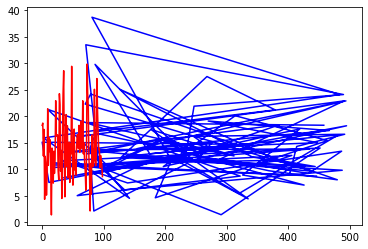

In [52]:
plt.plot(y_test,color="blue")
plt.plot(y_pred2,color="red")

# Visualizing the relationship between them

In [53]:
player.head()

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250000,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,0.406362,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015000,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298000,0.093,15.2


<AxesSubplot:ylabel='Frequency'>

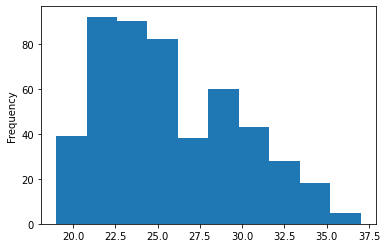

In [54]:
player["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

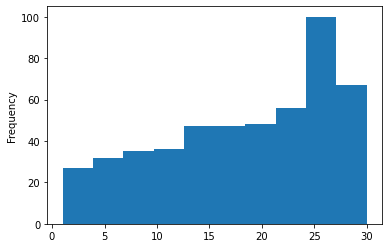

In [55]:
player["Games"].plot.hist(bins=10)

<AxesSubplot:>

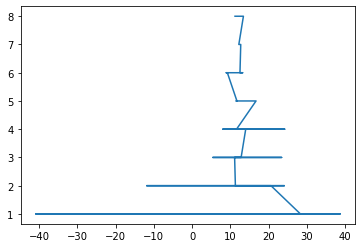

In [70]:
player["Player Efficiency Rating"].value_counts().plot()

In [71]:
pd.crosstab(player["Age"],player["Games"])

Games,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Age,,,,,,,,,,,,,,,,,,,,,
19,0,0,1,1,0,1,1,0,0,0,...,1,0,1,0,0,2,0,1,1,0
20,0,0,1,1,0,1,2,1,1,0,...,1,1,1,2,2,1,2,2,0,1
21,1,1,0,1,1,2,1,2,1,1,...,1,0,1,1,2,2,5,1,0,0
22,1,1,1,4,1,3,3,1,1,1,...,0,3,4,3,1,2,2,4,0,0
23,1,3,4,1,0,0,1,2,2,5,...,1,2,1,1,0,6,1,2,0,1
24,1,0,0,1,1,3,1,2,1,1,...,1,1,2,2,2,3,6,1,4,0
25,1,0,1,0,0,4,0,3,2,0,...,0,1,2,1,1,1,3,4,5,1
26,0,0,1,1,0,0,0,1,0,2,...,0,1,1,1,3,2,3,5,0,2
27,1,1,2,2,0,0,1,0,0,1,...,0,1,2,2,3,2,1,1,4,0


<AxesSubplot:xlabel='Age'>

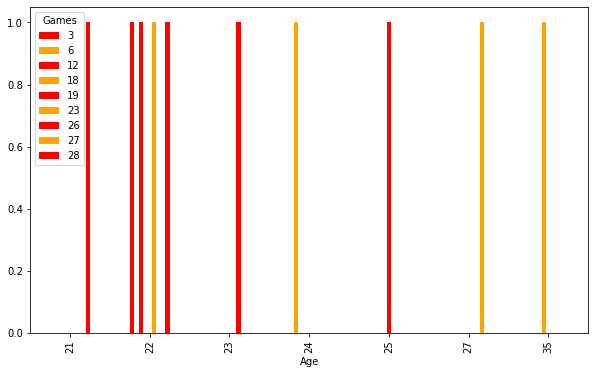

In [81]:
pd.crosstab(player["Age"][:10],player["Games"][:10]).plot(kind="bar",figsize=(10,6),color=["red","orange"])

<AxesSubplot:>

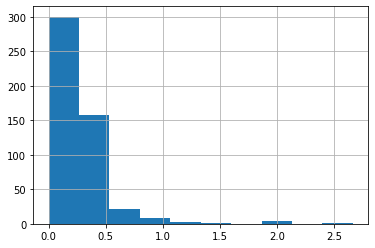

In [74]:
player["Free throw attempt rate"].hist()

<AxesSubplot:>

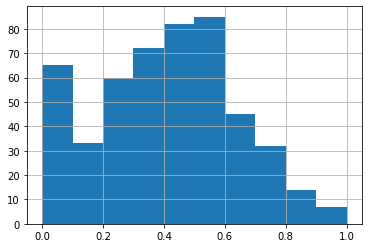

In [75]:
player["Threepoint Attempt rate"].hist()

<AxesSubplot:>

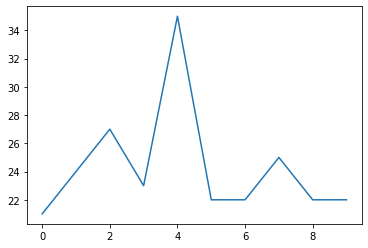

In [84]:
player["Age"][:10].plot()

<AxesSubplot:>

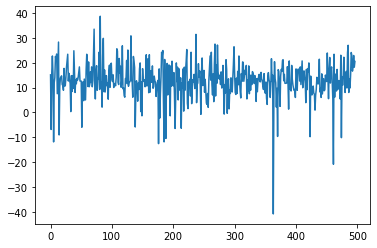

In [85]:
player["Player Efficiency Rating"].plot()